In [1]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import shap
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv("G:\\virtual experience\\BCG\\ml_train_processed.csv")
hist = pd.read_csv("G:\\virtual experience\\BCG\\ml_history_processed.csv")

In [3]:
main = pd.merge(train, hist, on="id")
main.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,activity_kwu,activity_sfi,activity_wxe,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,48ada52261e7cf58715202705a0451c9,5.490346,0.0,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,...,0,0,0,1/1/2015,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
1,48ada52261e7cf58715202705a0451c9,5.490346,0.0,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,...,0,0,0,2/1/2015,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
2,48ada52261e7cf58715202705a0451c9,5.490346,0.0,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,...,0,0,0,3/1/2015,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
3,48ada52261e7cf58715202705a0451c9,5.490346,0.0,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,...,0,0,0,4/1/2015,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
4,48ada52261e7cf58715202705a0451c9,5.490346,0.0,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,...,0,0,0,5/1/2015,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426


In [4]:
pd.DataFrame({"Dataframe columns": main.columns})

,Dataframe columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_discount_energy
6,forecast_meter_rent_12m
7,forecast_price_energy_p1
8,forecast_price_energy_p2
9,forecast_price_pow_p1


In [5]:
y = main["churn"]
X = main.drop(labels = ["id","churn","price_date"],axis = 1)

In [10]:
#y = y.map({'churned': 1, 'retention': 0}).astype(int)

Split into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

# XGBoost 

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print("Accuracy: ", accuracy_score(y_test, xgbprd))
print("Precision: ", precision_score(y_test, xgbprd, average="binary",pos_label="churned"))
print("Recall: ", recall_score(y_test, xgbprd, average="binary",pos_label="churned"))


[[   36  4741]
 [    0 43474]]
Accuracy:  0.9017429690576361
Precision:  1.0
Recall:  0.007536110529621101


# Gradient Boosting

In [44]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print("Accuracy: ", accuracy_score(y_test, gbkpred))
print("Precision: ", precision_score(y_test, gbkpred, average="binary",pos_label="churned"))
print("recall: ", recall_score(y_test, gbkpred, average="binary",pos_label="churned"))

[[  110  4667]
 [    9 43465]]
Accuracy:  0.9030900913970695
Precision:  0.9243697478991597
recall:  0.023027004396064477


# Random Forest

In [43]:
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print("Accuracy: ", accuracy_score(y_test, rfcpred))
print("Precision: ", precision_score(y_test, rfcpred, average="binary",pos_label="churned"))
print("Recall: ", recall_score(y_test, rfcpred, average="binary",pos_label="churned"))

[[ 4776     1]
 [    0 43474]]
Accuracy:  0.9999792750409318
Precision:  1.0
Recall:  0.9997906635963995


# Explaining outcome using SHAP

In [54]:
xgb = XGBClassifier()
model= xgb.fit(X_train,y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

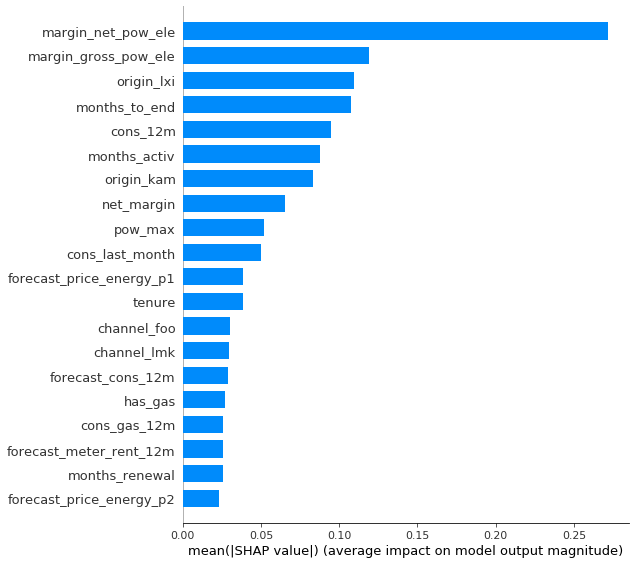

In [55]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

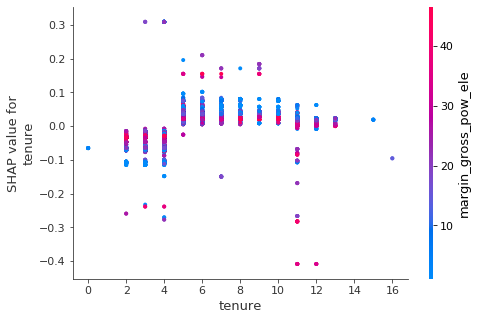

In [56]:
shap.dependence_plot("tenure", shap_values, X_test)